# <font style = "color:rgb(50,120,229)">Implementation of Morphological Operations</font>
We had discussed how to use dilation and erosion operations in the previous section. In this section, we will see what is going on under the hood. The most important concept that you need to understand is the Structuring element. We will discuss about the structuring element and how it is used for performing these morphological operations.

## <font style="color:rgb(50,120,229)">Implement Method 2</font>
1. Scan through the image and superimpose the kernel on the neighborhood of each pixel. 
1. Perform an AND operation of the neighborhood with the kernel.
1. Replace the pixel value with the `maximum` value in the neighborhood given by the kernel. 

This means that you check every pixel and its neighborhood with respect to the kernel and change the pixel to white if any of the pixel in this neighborhood is white. OpenCV implements an optimized version of this method. This will work even if the image is not a binary image.

## <font style="color:rgb(50,120,229)">Import Libraries </font>

In [4]:
import cv2
import numpy as np
from dataPath import DATA_PATH
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)
matplotlib.rcParams['image.cmap'] = 'gray'

# <font style="color:rgb(50,120,229)">Create a Demo Image</font>
## <font style="color:rgb(50,120,229)">Create an empty matrix </font>

[[0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]]


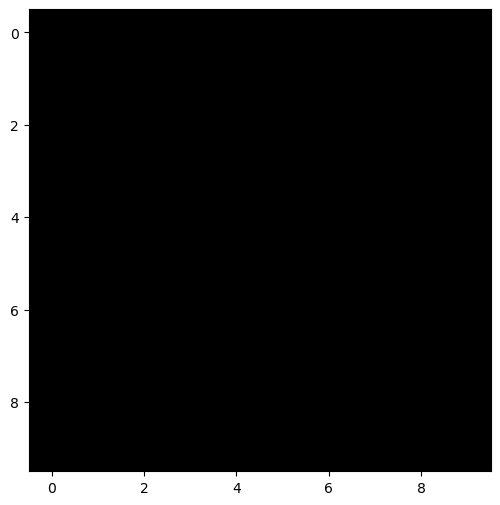

In [6]:
im = np.zeros((10,10),dtype='uint8')
print(im);
plt.imshow(im)

## <font style="color:rgb(50,120,229)">Lets add some white blobs</font>

We have added the blobs at different places so that all boundary cases are covered in this example.

[[0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 1 1 0 0]
 [0 0 0 0 0 1 1 1 0 0]
 [0 0 0 0 0 1 1 1 0 0]
 [0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0]]


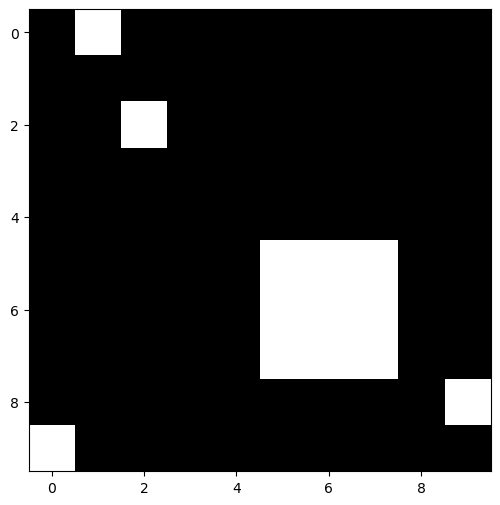

In [7]:
im[0,1] = 1
im[-1,0]= 1
im[-2,-1]=1
im[2,2] = 1
im[5:8,5:8] = 1

print(im)
plt.imshow(im)

This becomes our demo Image for illustration purpose

## <font style="color:rgb(50,120,229)">Create an Ellipse Structuring Element </font>
Let us create a 3x3 ellipse structuring element.

In [8]:
element = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3,3))
print(element)

[[0 1 0]
 [1 1 1]
 [0 1 0]]


In [9]:
ksize = element.shape[0]

In [10]:
height,width = im.shape[:2]
height,width 

(10, 10)

## <font style="color:rgb(50,120,229)">First check the correct output using cv2.dilate</font>

[[1 1 1 0 0 0 0 0 0 0]
 [0 1 1 0 0 0 0 0 0 0]
 [0 1 1 1 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 1 1 0 0]
 [0 0 0 0 1 1 1 1 1 0]
 [0 0 0 0 1 1 1 1 1 0]
 [0 0 0 0 1 1 1 1 1 1]
 [1 0 0 0 0 1 1 1 1 1]
 [1 1 0 0 0 0 0 0 0 1]]


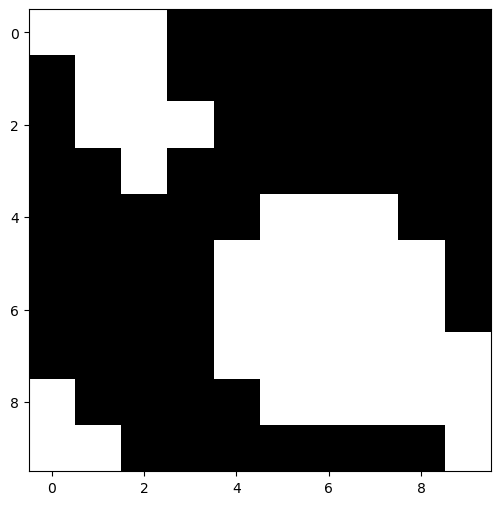

In [11]:
dilatedEllipseKernel = cv2.dilate(im, element)
print(dilatedEllipseKernel)
plt.imshow(dilatedEllipseKernel)

## <font style="color:rgb(50,120,229)">Write Code for Dilation from scratch</font>

Create a VideoWriter object and write the result obtained at the end of each iteration to the object. Save the video to **`dilationScratch.avi`** and display it using markdown below:

**`dilationScratch.avi` will come here**

```<video width="320" height="240" controls>
  <source src="dilationScratch.avi" type="video/mp4">
</video>```

**Note**

1. Use FPS as 10 and frame size as 50x50
2. Before writing the frame, resize it to 50x50
3. Convert the resized frame to BGR
4. Release the object

In [12]:
ksize

3

(12, 12)


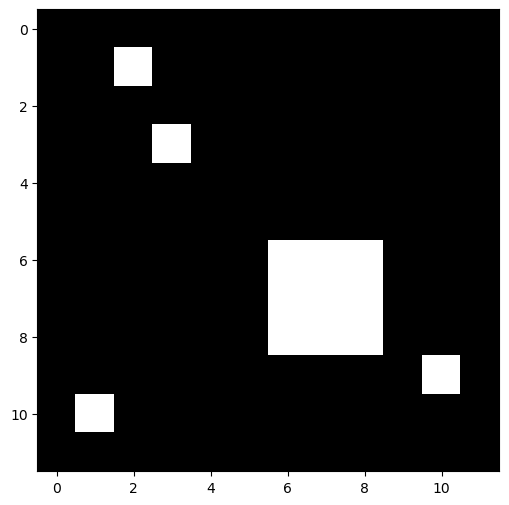

In [13]:
border = ksize//2
# paddedIm = np.zeros((height + border*2, width + border*2))
paddedIm = np.zeros((height , width))
paddedIm = cv2.copyMakeBorder(im, border, border, border, border, cv2.BORDER_CONSTANT, value = 0)
paddedDilatedIm = paddedIm.copy()
print(paddedDilatedIm.shape)
plt.imshow(paddedDilatedIm)


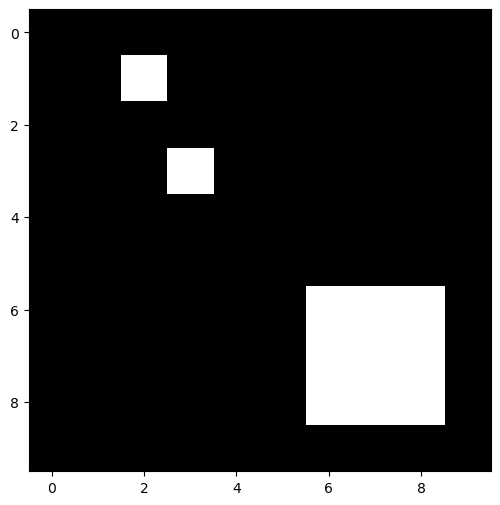

In [14]:
plt.imshow(paddedDilatedIm[:10, :10])

(10, 10)


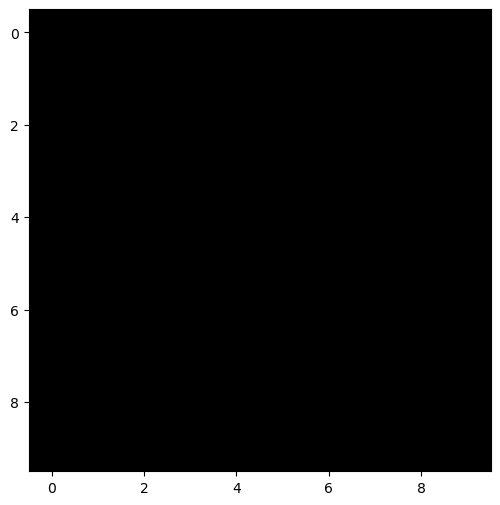

In [19]:
paddedDilatedIm = np.zeros_like(im)
print(paddedDilatedIm.shape)
plt.imshow(paddedDilatedIm)


In [20]:
height + border*2

12

In [21]:
border = ksize//2
paddedIm = np.zeros((height + border*2, width + border*2))
paddedIm = cv2.copyMakeBorder(im, border, border, border, border, cv2.BORDER_CONSTANT, value = 0)
paddedDilatedIm = paddedIm.copy()
# Create an output image with the same shape as 'im'
# paddedDilatedIm = np.zeros_like(im)

# Create a VideoWriter object
# Use frame size as 50x50
###
fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter(filename = 'dilationScratch.avi', fourcc = fourcc, fps = 10, frameSize = (50,50))
###

for h_i in range(border, height+border):
    for w_i in range(border,width+border):
        ###
        # Superimpose the kernel on the neighborhood
        neighborhood = paddedIm[h_i - border : (h_i + border) + 1, w_i - border : (w_i + border) + 1]

        # Perform AND operation with the kernel
        result = cv2.bitwise_and(neighborhood, element)
        ###

        # Replace the pixel value with the maximum value in the neighborhood
        paddedDilatedIm[h_i - border, w_i - border] = np.max(result)


        # Resizing output to 50x50 before writing it to the video
        ###
        resized_frame = cv2.resize(paddedDilatedIm[:10, :10], (50, 50),  interpolation=cv2.INTER_NEAREST)
        ###
        # Convert resizedFrame to BGR before writing
        ###
        resized_frame_bgr = cv2.cvtColor((resized_frame * 255).astype(np.uint8), cv2.COLOR_GRAY2BGR)
        ###
        # Writing the frame to the video
        out.write(resized_frame_bgr)

# Release the VideoWriter object
###
out.release()
###


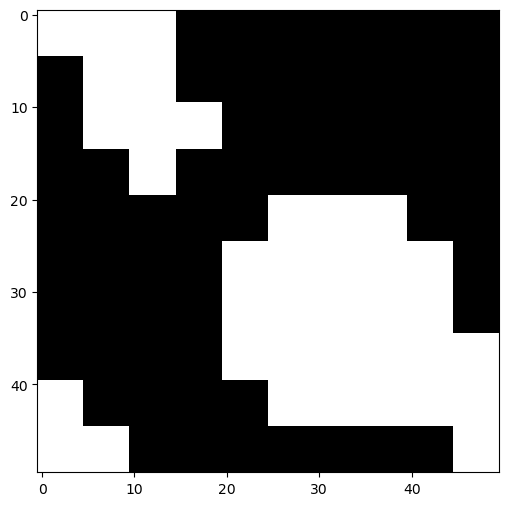

In [22]:
# Display final image (cropped)
###
plt.imshow(resized_frame_bgr)

###


<video width="320" height="240" controls>
  <source src="NoteBooks\dilationScratch.avi" type="video/mp4">
</video>

# <font style="color:rgb(50,120,229)">Implement Erosion </font>

## <font style="color:rgb(50,120,229)">Check the correct output using cv2.erode </font>

[[0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 1 1 0 0]
 [0 0 0 0 0 1 1 1 0 0]
 [0 0 0 0 0 1 1 1 0 0]
 [0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0]]


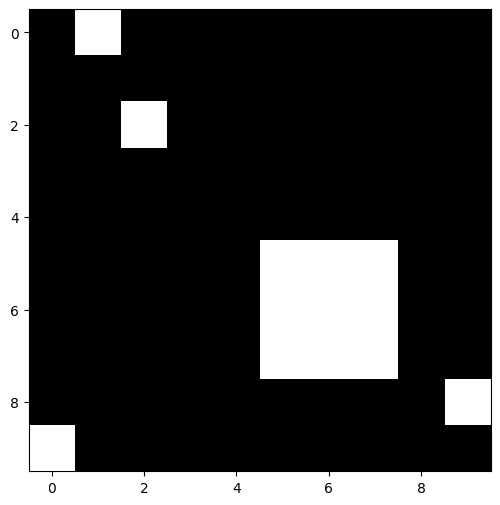

In [62]:
print(im)
plt.imshow(im)

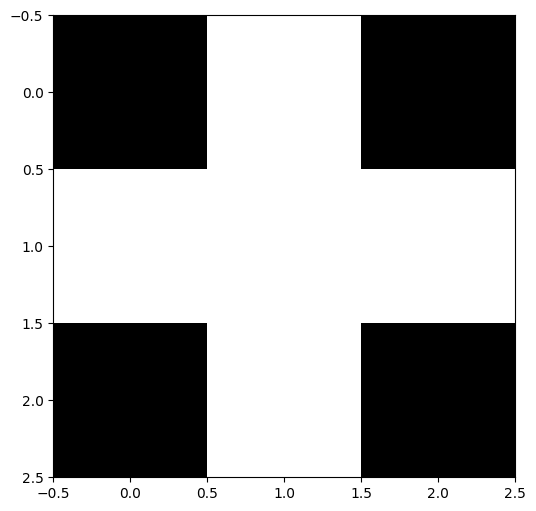

In [52]:
plt.imshow(element)

[[0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]]


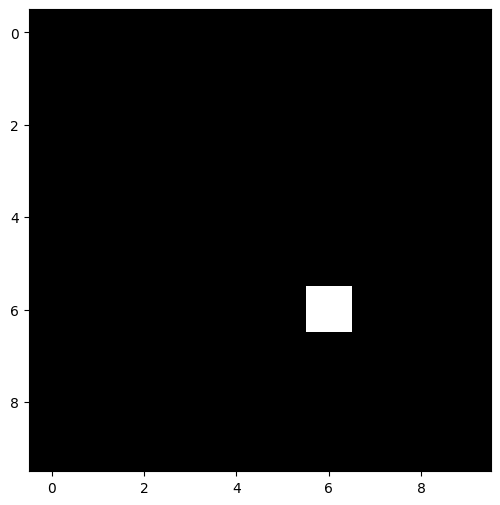

In [49]:
ErodedEllipseKernel = cv2.erode(im, element)
print(ErodedEllipseKernel)
plt.imshow(ErodedEllipseKernel);

## <font style="color:rgb(50,120,229)">Write code for Erosion from scratch</font>

Create a VideoWriter object and write the result obtained at the end of each iteration to the object. Save the video to **`erosionScratch.avi`** and display it using markdown below:

**`erosionScratch.avi` will come here**

<video width="320" height="240" controls>
  <source src="G:\OpenCV\Fundamentals of CV and IP\week3\NoteBooks\erosionScratch.avi" type="video/mp4">
</video>

**Note**

1. Use FPS as 10 and frame size as 50x50
2. Before writing the frame, resize it to 50x50
3. Convert the resized frame to BGR
4. Release the object

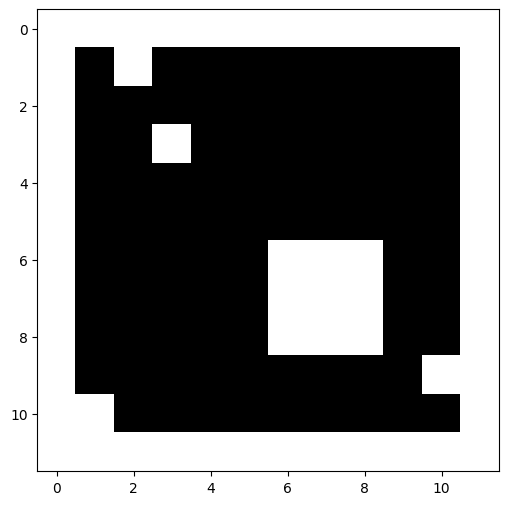

In [65]:
border = ksize//2
paddedIm = np.zeros((height + border*2, width + border*2))
paddedIm = cv2.copyMakeBorder(im, border, border, border, border, cv2.BORDER_CONSTANT, value = 1)
paddedErodedIm = paddedIm.copy()
plt.imshow(paddedIm)

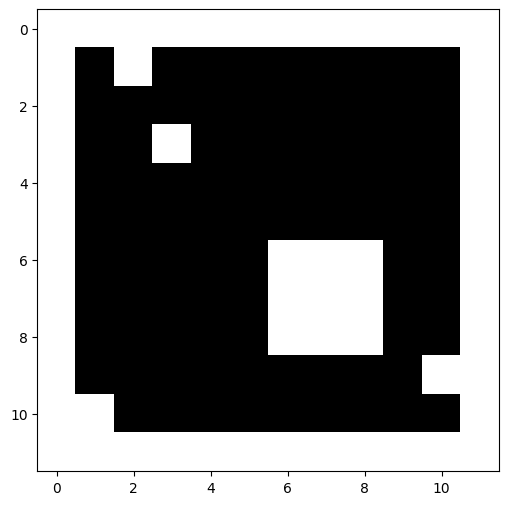

In [66]:
plt.imshow(paddedIm)

In [67]:

# Create a VideoWriter object
# Use frame size as 50x50
###
fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter(filename = 'erosionScratch.avi', fourcc = fourcc, fps = 10, frameSize = (50,50))
###
for h_i in range(border, height+border):
    for w_i in range(border,width+border):
        ###
        # Superimpose the kernel on the neighborhood
        neighborhood = paddedIm[h_i - border : (h_i + border) + 1, w_i - border : (w_i + border) + 1]

        # Perform AND operation with the complement of the kernel
        result = cv2.bitwise_or(neighborhood, 1 - element)

        # Replace the pixel value with the minimum value in the neighborhood
        paddedErodedIm[h_i - border, w_i - border] = np.min(result)

        # Resizing output to 50x50 before writing it to the video
        ###
        resized_frame = cv2.resize(paddedErodedIm[:10, :10], (50, 50),  interpolation=cv2.INTER_NEAREST)
        ###
        # Convert resizedFrame to BGR before writing
        ###
        resized_frame_bgr = cv2.cvtColor((resized_frame * 255).astype(np.uint8), cv2.COLOR_GRAY2BGR)
        ###
        # Writing the frame to the video
        out.write(resized_frame_bgr)

# Release the VideoWriter object
###
out.release()
###


<video width="320" height="240" controls>
  <source src="erosionScratch.avi" type="video/mp4">
</video>

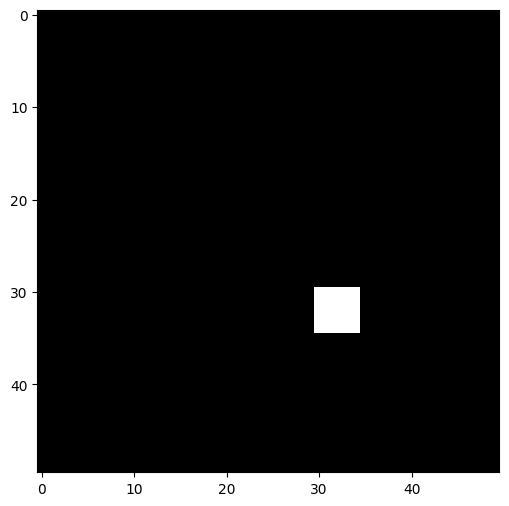

In [68]:
# Display final image (cropped)
###
# print(resized_frame_bgr)
plt.imshow(resized_frame_bgr)
###
